In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [18]:
# Check for GPU availability
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available.")
    # Additional information about the GPUs
    for gpu in gpu_available:
        print("GPU:", gpu)
else:
    print("No GPU available. Using CPU.")


GPU is available.
GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [19]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 10

In [20]:
interim_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "snakes",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3695 files belonging to 10 classes.


In [21]:
interim_class_names = interim_dataset.class_names
interim_class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [22]:
interim_snake_labels = { 
    0: 'Rat snake', 
    1: 'Cobra', 
    2: 'Indian Python', 
    3: 'Sand Boa', 
    4: 'Hump Nosed Viper', 
    5: 'Whip Snake', 
    6: 'Sri Lankan Krait', 
    7: 'Common Krait', 
    8: 'Russell’s Viper', 
    9: 'Saw-scaled Viper'
}

In [23]:
len(interim_dataset)

231

In [24]:
for image_batch, label_batch in interim_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())


(16, 256, 256, 3)
[5 5 9 0 9 3 4 1 9 4 2 1 8 6 1 9]


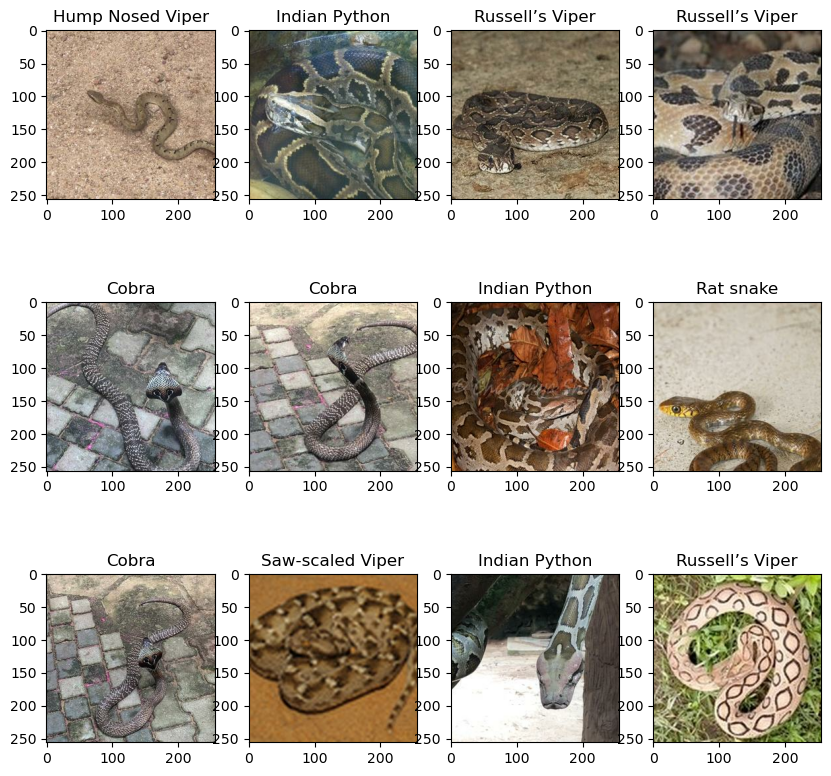

In [25]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in interim_dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(interim_snake_labels[int(interim_class_names[label_batch[i]])])

In [26]:
train_ds = interim_dataset.take(131)
print(len(train_ds))
test_ds = interim_dataset.skip(131)
# print(len(test_ds))
val_ds = test_ds.take(40)
print(len(val_ds))
test_ds = test_ds.skip(40)
print(len(test_ds))

131
40
60


In [27]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
input_shp = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

interim_model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(256,(3,3), activation='relu', input_shape = input_shp),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

interim_model.build(input_shape=input_shp)

In [30]:
interim_model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (16, 254, 254, 256)       7168      
                                                                 
 max_pooling2d_2 (MaxPooling  (16, 127, 127, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (16, 125, 125, 256)       590080    
                                                                 
 max_pooling2d_3 (MaxPooling  (16, 62, 62, 256)        0         
 2D)                                                  

In [31]:
interim_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [32]:
interim_history = interim_model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_5/conv2d_2/Relu' defined at (most recent call last):
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\kernelapp.py", line 724, in start
      self.io_loop.start()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\kernelbase.py", line 408, in dispatch_shell
      await result
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Kimuthu Kisal\AppData\Local\Temp\ipykernel_42532\3077196595.py", line 1, in <module>
      interim_history = interim_model.fit(
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Kimuthu Kisal\anaconda3\envs\tf210\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_5/conv2d_2/Relu'
OOM when allocating tensor with shape[16,256,254,254] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_5/conv2d_2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_11844]

In [ ]:
scores = interim_model.evaluate(test_ds)

In [ ]:
print(interim_history)
print(interim_history.params)
print(interim_history.history.keys())

In [ ]:
acc = interim_history.history['accuracy']
val_acc = interim_history.history['val_accuracy']
loss = interim_history.history['loss']
val_loss = interim_history.history['val_loss']

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Acccuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
interim_model.save(f"../models/final_02_01.h5")

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",interim_class_names[first_label])
    
    batch_prediction = interim_model.predict(images_batch)
    print("predicted label:",interim_class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(interim_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = interim_model.predict(img_array)

    predicted_class = interim_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
test_snake_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "test_snake_images",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

test_snake_ds_final = tf.keras.preprocessing.image_dataset_from_directory(
    "mix",
    shuffle = False,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE*9
)

# Define a function to get the file name
def get_file_name(image_path):
    # Use os.path.basename to extract only the file name from the path
    return os.path.basename(image_path)

# Create a list to store file names
file_names = []
for images, labels in test_snake_ds_final:
    for image_path in test_snake_ds_final.file_paths:
        file_name = get_file_name(image_path)
        file_names.append(file_name)
    
plt.figure(figsize=(12, 15*10))
plt.axis('off')

for images, labels in test_snake_ds_final:
    for i in range(141):
        ax = plt.subplot(40, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(interim_model, images[i].numpy())
        actual_class = interim_class_names[labels[i]] 
        
#         plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.title(f"File: {file_names[i]} \n Predicted: {interim_snake_labels[int(predicted_class)]}.\n Confidence: {confidence}%")
        plt.axis('off')
# plt.axis("off")

In [ ]:
# interim_model.save("../final01.h5")

In [ ]:
# MODEL = tf.keras.models.load_model("../final01.h5")
# MODEL.save("../snakedetectionmodel.h5")

In [ ]:
# test_snake_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "test_snake_images",
#     shuffle = True,
#     image_size = (256,256),
#     batch_size = 32
# )

In [ ]:
# def predict(MODEL, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
#     img_array = tf.expand_dims(img_array, 0)

#     predictions = MODEL.predict(img_array)

#     predicted_class = np.argmax(predictions[0])
#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence

In [ ]:
# import numpy as np
# plt.figure(figsize=(10, 10))
# plt.axis('off')

# for images, labels in test_snake_ds.take(1):
#     for i in range(9):
        
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
        
#         predicted_class, confidence = predict(MODEL, images[i].numpy())
# #         actual_class = interim_class_names[labels[i]] 
        
# #         plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}.\n Confidence: {confidence}%")
#         plt.title(f"Predicted: {int(predicted_class)}.\n Confidence: {confidence}%")
#         plt.axis('off')
# # plt.axis("off")